In [ ]:
!pip install shap


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the dataset
file_path = "/content/airflow_cleaned_data.csv"
df = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = df.drop(columns=["COHORT"])
y = df["COHORT"]


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)


In [ ]:
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [ ]:
# Get the best hyperparameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Hyperparameters:", best_params_rf)
print("Best F1 Score:", best_score_rf)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score: 0.9115443596395665


In [ ]:
# Use the best estimator to make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculate the F1 score on the test set
from sklearn.metrics import f1_score
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Test F1 Score:", test_f1_score)


Test F1 Score: 0.8996983853163322


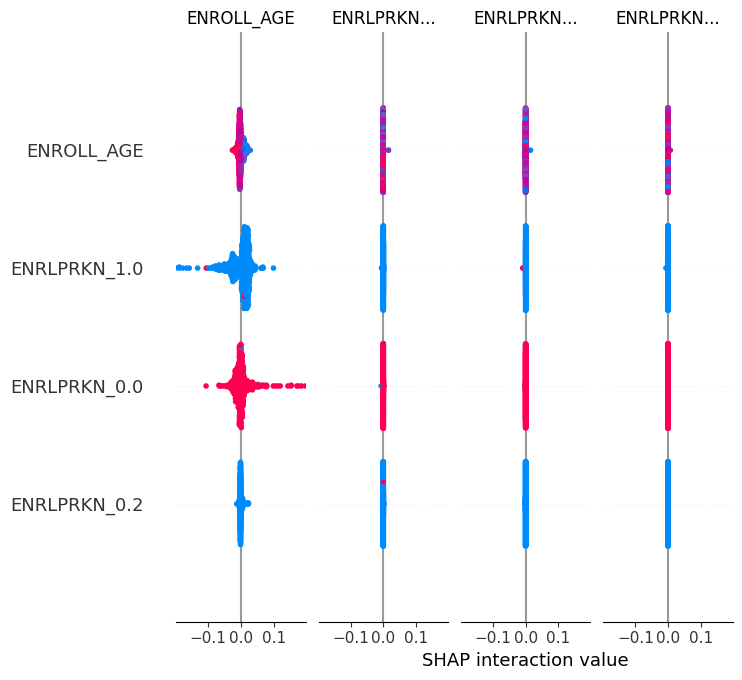

In [ ]:
import shap

# Initialize the SHAP explainer for Random Forest
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot a summary of feature importance
shap.summary_plot(shap_values, X_test)

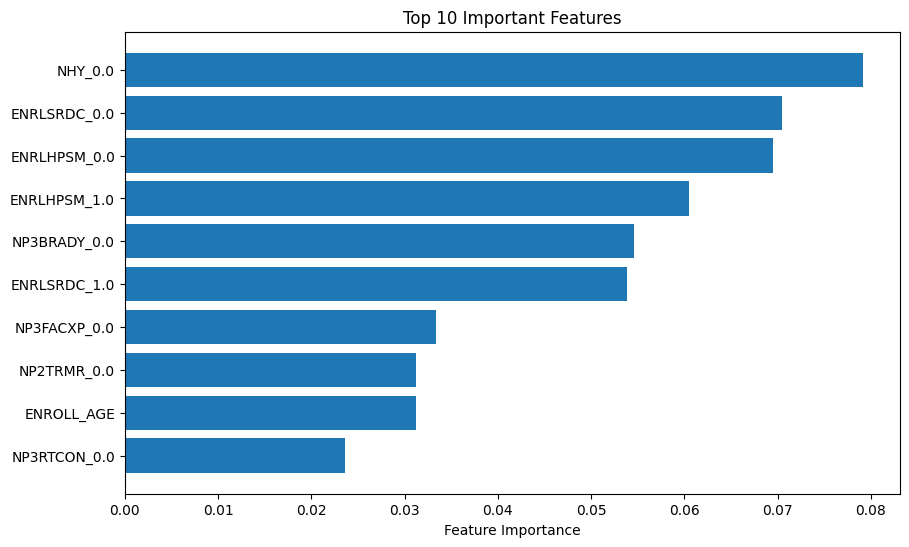

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.show()


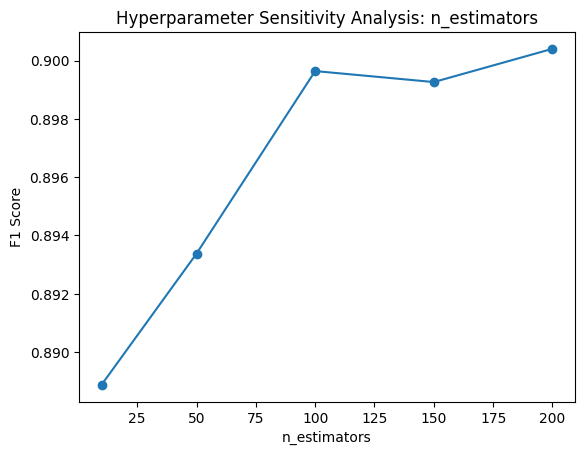

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Test different values for n_estimators
n_estimators_range = [10, 50, 100, 150, 200]
f1_scores = []

for n in n_estimators_range:
    # Initialize the model with the current n_estimators value
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate F1 Score and store it
    score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(score)

# Plot the sensitivity analysis
plt.plot(n_estimators_range, f1_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('Hyperparameter Sensitivity Analysis: n_estimators')
plt.show()
